# Projeto 1: Report de mercado

### Desafio:

* Automação de um relatório de fechamento de mercado com o Python através da coleta de cotações históricas do Ibovespa e Dólar e do envio diário através de uma ferramenta de e-mail automaticamente.  

### Instalando e importando os módulos e bibliotecas.

In [1]:
!pip install mplcyberpunk

In [2]:
!pip install yfinance==0.2.40

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk

### Pegando as cotações históricas.

In [4]:
tickers = ["^BVSP", "^GSPC", "BRL=X"]

In [5]:
dados_mercado = yf.download(tickers, period = "6mo")
dados_mercado = dados_mercado["Adj Close"]
dados_mercado

[*********************100%%**********************]  3 of 3 completed


Ticker,BRL=X,^BVSP,^GSPC
Date,,,
2024-03-11,4.97754,126124.00000,5117.939941
2024-03-12,4.97740,127668.00000,5175.270020
2024-03-13,4.96870,128006.00000,5165.310059
2024-03-14,4.96920,127690.00000,5150.479980
2024-03-15,4.99270,126742.00000,5117.089844
...,...,...,...
2024-09-03,5.61510,134353.00000,5528.930176
2024-09-04,5.64750,136111.00000,5520.069824
2024-09-05,5.64200,136502.00000,5503.410156


### Tratando dados coletados.

In [6]:
dados_mercado = dados_mercado.dropna()

dados_mercado

Ticker,BRL=X,^BVSP,^GSPC
Date,,,
2024-03-11,4.97754,126124.00000,5117.939941
2024-03-12,4.97740,127668.00000,5175.270020
2024-03-13,4.96870,128006.00000,5165.310059
2024-03-14,4.96920,127690.00000,5150.479980
2024-03-15,4.99270,126742.00000,5117.089844
...,...,...,...
2024-09-03,5.61510,134353.00000,5528.930176
2024-09-04,5.64750,136111.00000,5520.069824
2024-09-05,5.64200,136502.00000,5503.410156


In [7]:
dados_mercado.columns = ["DOLAR", "IBOVESPA", "S&P500"]

dados_mercado

,DOLAR,IBOVESPA,S&P500
Date,,,
2024-03-11,4.97754,126124.00000,5117.939941
2024-03-12,4.97740,127668.00000,5175.270020
2024-03-13,4.96870,128006.00000,5165.310059
2024-03-14,4.96920,127690.00000,5150.479980
2024-03-15,4.99270,126742.00000,5117.089844
...,...,...,...
2024-09-03,5.61510,134353.00000,5528.930176
2024-09-04,5.64750,136111.00000,5520.069824
2024-09-05,5.64200,136502.00000,5503.410156


### Criando gráficos de performance.

In [8]:
plt.style.use("cyberpunk")

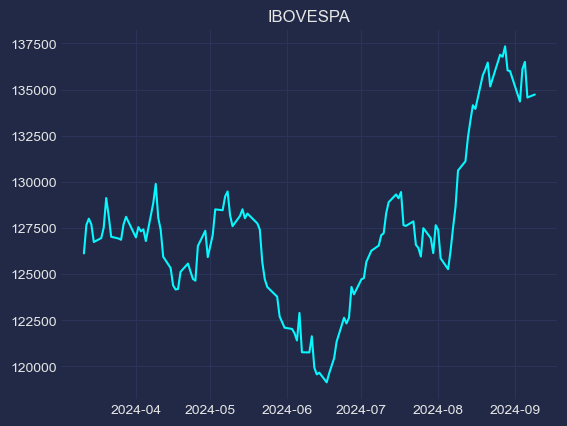

In [9]:
plt.plot(dados_mercado["IBOVESPA"])
plt.title("IBOVESPA")

plt.savefig("ibovespa.png")

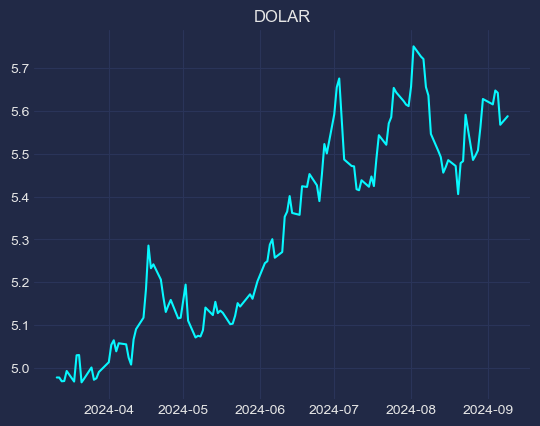

In [10]:
plt.plot(dados_mercado["DOLAR"])
plt.title("DOLAR")

plt.savefig("dolar.png")

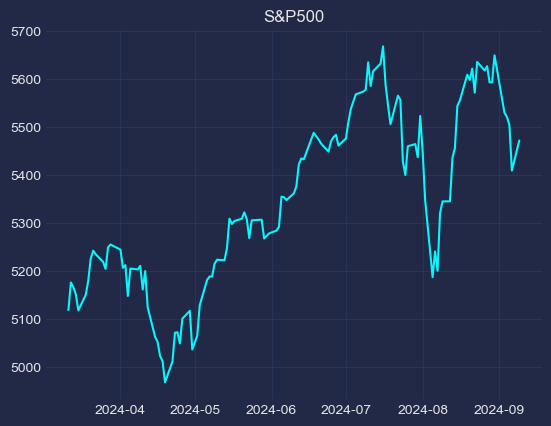

In [11]:
plt.plot(dados_mercado["S&P500"])
plt.title("S&P500")

plt.savefig("sp500.png")

###  Calculando retornos diários.

In [12]:
retornos_diarios = dados_mercado.pct_change()

retornos_diarios

,DOLAR,IBOVESPA,S&P500
Date,,,
2024-03-11,NaN,NaN,NaN
2024-03-12,-0.000028,0.012242,0.011202
2024-03-13,-0.001748,0.002647,-0.001925
2024-03-14,0.000101,-0.002469,-0.002871
2024-03-15,0.004729,-0.007424,-0.006483
...,...,...,...
2024-09-03,-0.002239,-0.012139,-0.021151
2024-09-04,0.005770,0.013085,-0.001603
2024-09-05,-0.000974,0.002873,-0.003018


In [13]:
retornos_diarios["DOLAR"].iloc[-3]

-0.0009738538726100643

In [14]:
retorno_dolar = retornos_diarios["DOLAR"].iloc[-1]
retorno_ibovespa = retornos_diarios["IBOVESPA"].iloc[-1]
retorno_sp = retornos_diarios["S&P500"].iloc[-1]

In [15]:
retorno_dolar = str(round(retorno_dolar * 100, 2)) + "%"

retorno_dolar

'0.36%'

In [16]:
retorno_ibovespa = str(round(retorno_ibovespa * 100, 2)) + "%"
retorno_sp = str(round(retorno_sp * 100, 2)) + "%"

retorno_sp

'1.16%'

In [17]:
retorno_ibovespa

'0.12%'

### Configurando para enviar o e-mail.

In [18]:
!pip install pywin32

In [19]:
import win32com.client as win32

In [20]:
outlook = win32.Dispatch("outlook.application") 

email = outlook.CreateItem(0)

In [21]:
email.To = "larissa-marinho1@hotmail.com"
email.Subject = "Relatório de Mercado"
email.Body = f'''Prezado(a), segue o relatório de mercado:

* O Ibovespa teve o retorno de {retorno_ibovespa}.
* O Dólar teve o retorno de {retorno_dolar}.
* O S&P500 teve o retorno de {retorno_sp}.

Segue em anexo a peformance dos ativos nos últimos 6 meses.

Att,
Larissa Marinho


'''

anexo_ibovespa = r"C:\Users\ameri\Downloads\ibovespa.png"
anexo_dolar = r"C:\Users\ameri\Downloads\dolar.png"
anexo_sp = r"C:\Users\ameri\Downloads\sp500.png"

email.Attachments.Add(anexo_ibovespa)
email.Attachments.Add(anexo_dolar)
email.Attachments.Add(anexo_sp)

email.Send()
